In [42]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import WMAP9

In [33]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 150
plt.rc('text',usetex=True)

## check cosmology
http://www.astro.ucla.edu/~wright/CosmoCalc.html

In [34]:
z=0.5
dis = WMAP9.angular_diameter_distance(z).value*1000
sep_phys = 6.2 #kpc
print('angular sep (arcsec):',sep_phys / dis / np.pi * 180*3600)

angular sep (arcsec): 1.001144675490767


## replenishment/mass growth estimate

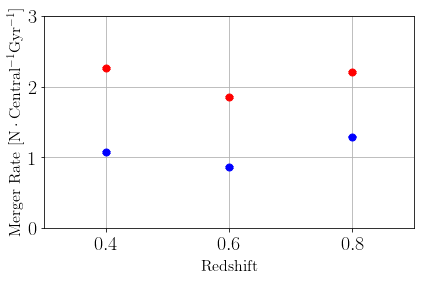

In [35]:
def merger_rate(z1,z2):
    n_sat_merge = np.array([])
    path = 'CUT_deep_catalogs/number_counts/'
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        n_sat_merge = np.append(n_sat_merge,np.genfromtxt(path+'number_sathist_merge_'+cat_name+'_'+str(z1)+'.txt'))
    return np.average(n_sat_merge)/(WMAP9.lookback_time(z1).value - WMAP9.lookback_time(z2).value)

def repl_rate(z1,z2):
    path = 'CUT_deep_catalogs/number_counts/'
    all_n_sat_z1 = np.array([])
    all_n_sat_z2 = np.array([])
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        all_n_sat_z1 = np.append(all_n_sat_z1,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z1)+'.txt'))
        all_n_sat_z2 = np.append(all_n_sat_z2,np.genfromtxt(path+'number_sathist_'+cat_name+'_'+str(z2)+'.txt'))
        
    n_merge_rate = merger_rate(z1,z2)
    repl_rate = n_merge_rate + np.average(all_n_sat_z2)-np.average(all_n_sat_z1)
    print(np.average(all_n_sat_z2),np.average(all_n_sat_z1))
    return repl_rate

def mass_growth_rate(z1,z2):
    path = 'CUT_deep_catalogs/number_counts/'
    mass_grow = np.array([])
    for cat_name in ['COSMOS_deep','ELAIS_deep','DEEP_deep','XMM-LSS_deep','SXDS_uddd']:
        mass_grow = np.append(mass_grow,np.genfromtxt(path+'mass_sathist_'+cat_name+'_'+str(z1)+'.txt'))
    return np.average(mass_grow)/(WMAP9.lookback_time(z1).value - WMAP9.lookback_time(z2).value)

   
plt.errorbar(0.4,merger_rate(0.4,0.2),0.013,fmt='or',capsize=4,ms=7)
plt.errorbar(0.6,merger_rate(0.6,0.4),0.015,fmt='or',capsize=4,ms=7)
plt.errorbar(0.8,merger_rate(0.8,0.6),0.009,fmt='or',capsize=4,ms=7)

plt.errorbar(0.4,mass_growth_rate(0.4,0.2)/1000.,0.013,fmt='ob',capsize=4,ms=7)
plt.errorbar(0.6,mass_growth_rate(0.6,0.4)/1000.,0.015,fmt='ob',capsize=4,ms=7)
plt.errorbar(0.8,mass_growth_rate(0.8,0.6)/1000.,0.009,fmt='ob',capsize=4,ms=7)

plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Merger Rate [$\mathrm{N\cdot Central^{-1} Gyr^{-1}}$]',fontsize=16)
# plt.legend(fontsize=15)
plt.grid()
plt.xlim([0.3,0.9])
plt.ylim([0,3])
plt.tight_layout()
plt.savefig('figures/merger_rate.png',dpi=150)
plt.show()

In [36]:
def combine_deep_smf3(ssfq, prefix,affix,z):
    
    smf = np.load(path+'smf_'+prefix+'_COSMOS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf1 = np.load(path+'smf_'+prefix+'_DEEP_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf2 = np.load(path+'smf_'+prefix+'_ELAIS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf3 = np.load(path+'smf_'+prefix+'_XMM-LSS_deep_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    smf4 = np.load(path+'smf_'+prefix+'_SXDS_uddd_7.0_all_'+ssfq+'_'+z+affix+'.npy')
    return smf+smf1+smf2+smf3+smf4

[ 4.54655134e+03  1.81107402e+04  1.09056711e+04  9.88076689e+03
  7.47484048e+03  6.05246192e+03  5.77327255e+03  4.94913531e+03
  3.95106169e+03  3.24136092e+03  2.70673989e+03  2.23214046e+03
  1.99911858e+03  1.67591718e+03  1.43725460e+03  9.44388218e+02
  4.94791133e+02  8.21377088e+01 -6.00000000e+00  0.00000000e+00]
[-121.19686174 -713.82307508 -531.44817141 -206.50644727  -18.06802413
   50.69502215  193.29632715  217.28733058  264.75270986  297.47652259
  330.17750391  256.06348575  204.59331458  163.11096346  106.74823945
   89.65174315   53.99164597   13.17182409    0.            0.        ]


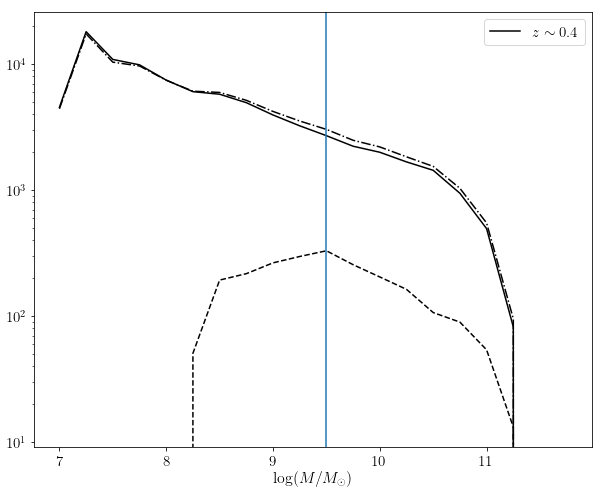

In [37]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(10,8))

path = 'CUT_deep_catalogs/test_smf/'
bin_edges = np.load(path+'bin_edges.npy')[:-1]

#load data
all_60 = combine_deep_smf3('all','60kpc',z='0.4',affix = '_new')
all_lt60 = combine_deep_smf3('all','lessthan_60kpc',z='0.4',affix = '_new')

print(all_60)
print(all_lt60)
# all
axs.plot(bin_edges, all_60,'k',label='$z\sim0.4$')
axs.plot(bin_edges, all_lt60,'--k')
axs.plot(bin_edges, all_lt60+all_60,'-.k')
axs.axvline(x=9.5,ymin=0,ymax=1e5)

axs.set_yscale('log')
axs.legend(fontsize=15)

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('$\log(M/M_\odot)$', fontsize=16)
plt.savefig('figures/satellite_smf_60kpc.png')
plt.show()

## AplPy test

In [38]:
import aplpy

INFO: Auto-setting vmax to  6.284e+02 [aplpy.core]


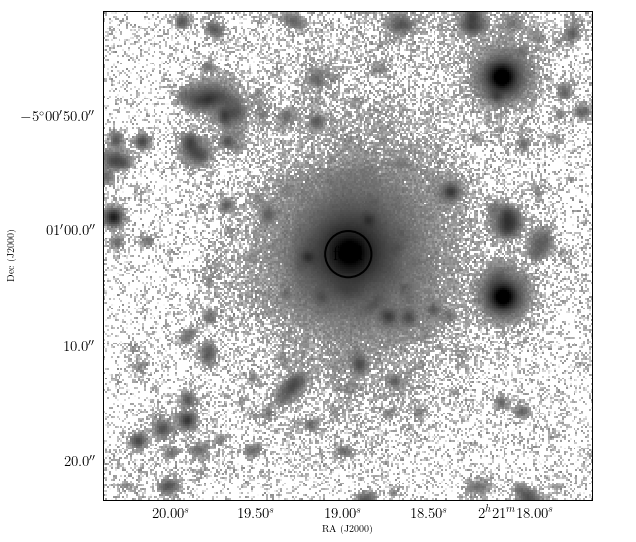

In [39]:
fig=aplpy.FITSFigure('CUT_deep_catalogs/test.fits')
fig.show_grayscale(stretch='log',vmin=0.1,invert=True)
fig.add_label(35.32905969514562, -5.01725845902161,'fdfd',fontsize=20,color='k')
fig.show_circles(35.32905969514562, -5.01725845902161, 2./3600,linewidth=2,color='k')

## Stack profiles from all redshifts

## Cluster Validation

In [ ]:
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
fig, axs = plt.subplots(1, 1, figsize=(10,8))

plt.scatter()

plt.show()